In [1]:

from google.colab import files
uploaded = files.upload()

Saving merged_full.xlsx to merged_full.xlsx


In [2]:
!pip install pyyaml h5py


In [0]:
import io
import pandas as pd
import numpy as np

data = pd.read_excel(io.BytesIO(uploaded['merged_full.xlsx']))


In [4]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

Using TensorFlow backend.


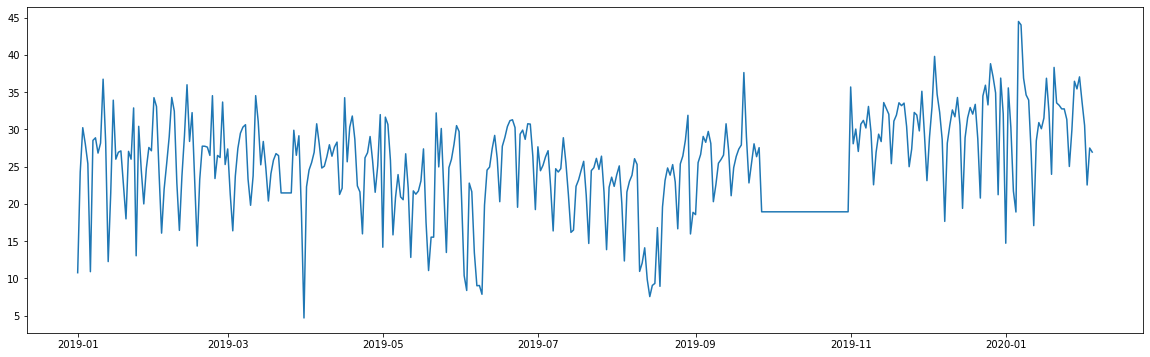

In [5]:
plt.figure(figsize=(20,6))
plt.plot(data.Tarih,data.Trafik_Indeks)
plt.show()

In [0]:
veri = data.filter(['Trafik_Indeks'])
dataset = veri.values
training_data_len = math.ceil( len(dataset) *.8)
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [0]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=["accuracy",'mse','mae'])

In [11]:
model.fit(x_train, y_train, batch_size=1, epochs=70)


Epoch 1/70
260/260 [==============================] - 13s 50ms/step - loss: 0.0241 - accuracy: 0.0000e+00 - mse: 0.0241 - mae: 0.1236
Epoch 2/70
260/260 [==============================] - 12s 45ms/step - loss: 0.0210 - accuracy: 0.0000e+00 - mse: 0.0210 - mae: 0.1126
Epoch 3/70
260/260 [==============================] - 11s 43ms/step - loss: 0.0190 - accuracy: 0.0038 - mse: 0.0190 - mae: 0.1092
Epoch 4/70
260/260 [==============================] - 11s 42ms/step - loss: 0.0191 - accuracy: 0.0000e+00 - mse: 0.0191 - mae: 0.1102
Epoch 5/70
260/260 [==============================] - 11s 43ms/step - loss: 0.0188 - accuracy: 0.0038 - mse: 0.0188 - mae: 0.1102
Epoch 6/70
260/260 [==============================] - 11s 43ms/step - loss: 0.0207 - accuracy: 0.0038 - mse: 0.0207 - mae: 0.1127
Epoch 7/70
260/260 [==============================] - 11s 41ms/step - loss: 0.0180 - accuracy: 0.0000e+00 - mse: 0.0180 - mae: 0.1061
Epoch 8/70
260/260 [==============================] - 11s 41ms/step - loss

In [0]:
test_data = scaled_data[training_data_len - 60: , : ]

x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [0]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

In [15]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

7.496736151229131

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


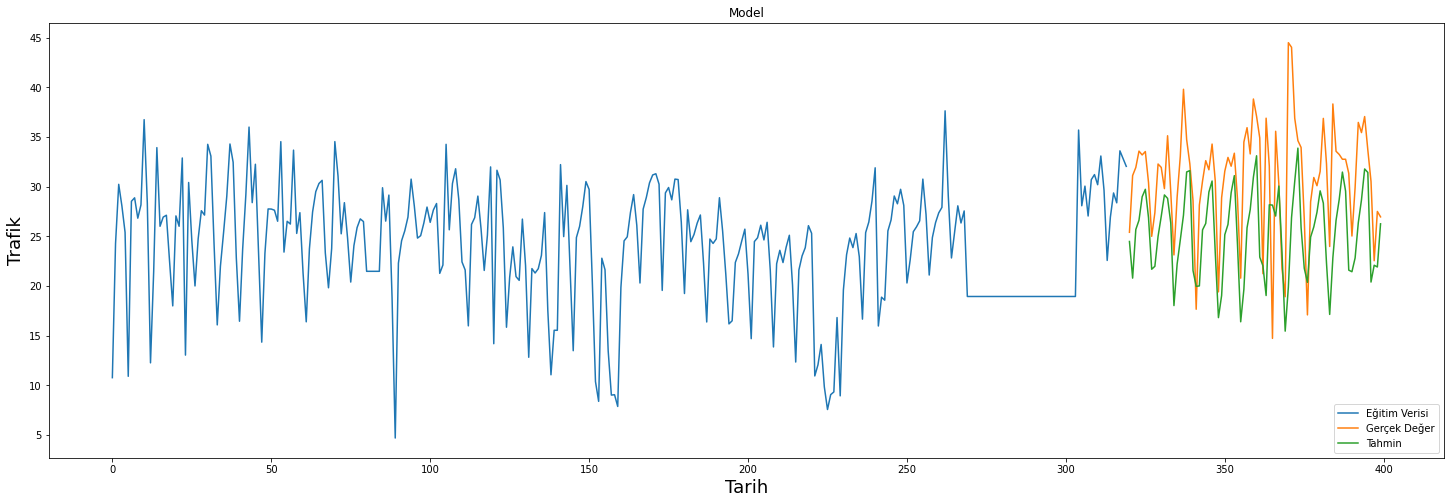

In [24]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(25,8))
plt.title('Model')
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('Trafik', fontsize=18)
plt.plot(train['Trafik_Indeks'])
plt.plot(valid[['Trafik_Indeks', 'Predictions']])
plt.legend(['Eğitim Verisi', 'Gerçek Değer', 'Tahmin'], loc='lower right')
plt.show()

In [17]:
valid

,Tarih,PM10,SO2,CO,NO2,NOX,NO,O3,Trafik_Indeks,Predictions
320,2019-11-17,56.083333,1.795833,604.512500,83.512500,159.591667,49.591667,15.116667,25.402778,24.477108
321,2019-11-18,97.300000,4.329167,1387.816667,104.158333,513.575000,266.879167,3.558333,31.114983,20.790932
322,2019-11-19,149.000000,4.766667,1442.437500,106.887500,581.204167,309.195833,3.733333,31.923611,25.680710
323,2019-11-20,68.883333,2.895833,786.170833,92.270833,265.262500,112.766667,11.858333,33.571429,26.614601
324,2019-11-21,70.500000,1.795833,808.354167,96.787500,322.045833,146.833333,6.212500,33.187500,28.978167
...,...,...,...,...,...,...,...,...,...,...
395,2020-01-31,39.741667,4.879167,485.958333,110.712500,201.875000,59.425000,15.725704,33.684028,31.427441
396,2020-02-01,35.270833,6.129167,531.820833,106.705000,217.865000,72.475000,15.725704,30.529617,20.395454
397,2020-02-02,54.179167,8.062500,496.963636,114.233333,242.229167,83.433333,15.725704,22.541667,22.087929
398,2020-02-03,41.179167,4.729167,227.941667,100.587500,138.345833,24.625000,15.725704,27.500000,21.911051


In [0]:
valid
model.save_weights('model.h5')

Ortalama Kayıp: 0.012971022557965534


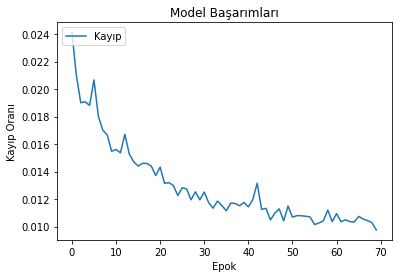

In [19]:

print("Ortalama Kayıp:",np.mean(model.history.history["loss"]))


plt.plot(model.history.history["loss"])
plt.title("Model Başarımları")
plt.ylabel("Kayıp Oranı")
plt.xlabel("Epok")
plt.legend(["Kayıp","Test"],loc="upper left")
plt.show()


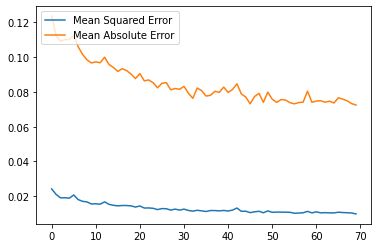

In [20]:
from keras.callbacks import History 
history = History()
plt.plot(model.history.history['mse'])
plt.plot(model.history.history['mae'])
plt.legend(["Mean Squared Error","Mean Absolute Error"],loc="upper left")
#plt.plot(model.history.history['mape'])
#plt.plot(model.history.history['cosine'])
plt.show()

